In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Lenovo/AI_Class/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


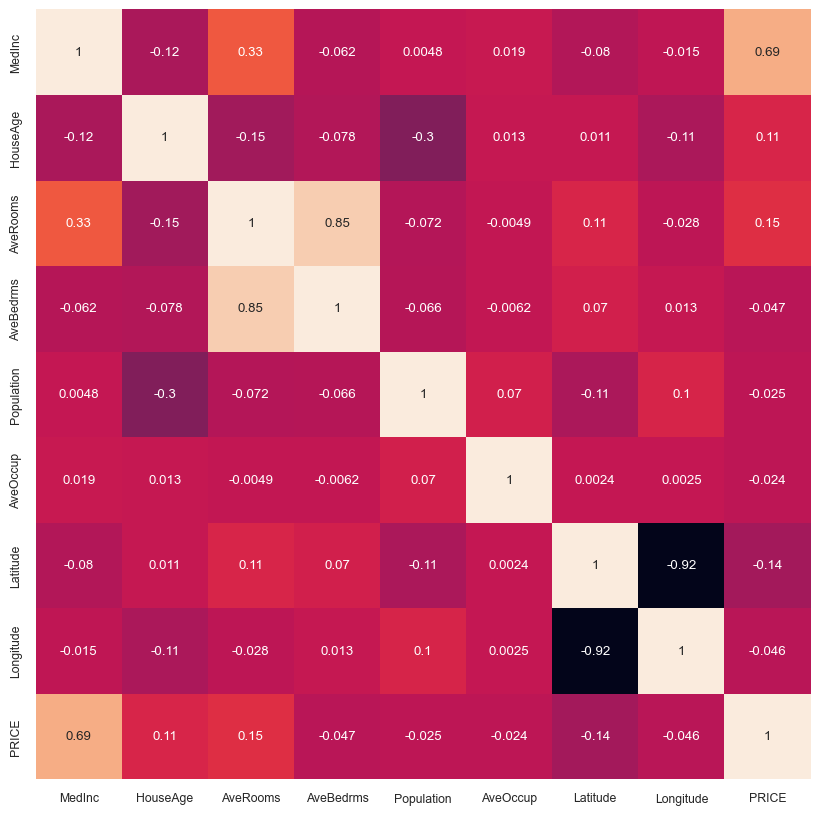

In [3]:
df_corr=df.corr()
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
X = df.drop('PRICE',axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [7]:
X=df.drop(columns=['HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Longitude'])
X.head

<bound method NDFrame.head of        MedInc  AveRooms  Latitude  PRICE
0      8.3252  6.984127     37.88  4.526
1      8.3014  6.238137     37.86  3.585
2      7.2574  8.288136     37.85  3.521
3      5.6431  5.817352     37.85  3.413
4      3.8462  6.281853     37.85  3.422
...       ...       ...       ...    ...
20635  1.5603  5.045455     39.48  0.781
20636  2.5568  6.114035     39.49  0.771
20637  1.7000  5.205543     39.43  0.923
20638  1.8672  5.329513     39.43  0.847
20639  2.3886  5.254717     39.37  0.894

[20640 rows x 4 columns]>

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 4) (16512,)
(4128, 4) (4128,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))


평균제곱근오차 1.1175178642927952e-30
평균제곱근오차 1.1175178642927952e-30
평균제곱근오차 1.1175178642927952e-30


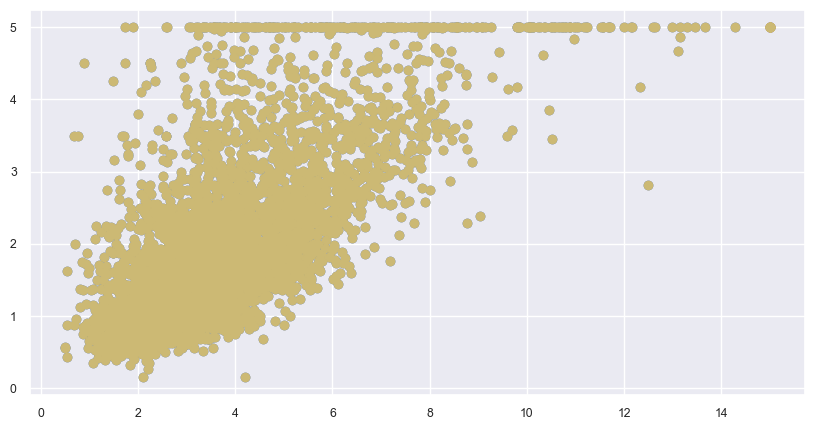

In [10]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [11]:
X=df.drop(columns=['Latitude'])
X.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Longitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556    -122.23   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842    -122.22   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260    -122.24   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945    -122.25   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467    -122.25   
...       ...       ...       ...        ...         ...       ...        ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606    -121.09   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807    -121.21   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635    -121.22   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209    -121.32   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981    -121.24  

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 2.8376092530887383e-26
평균제곱근오차 2.8376092530887383e-26
평균제곱근오차 2.8376092530887383e-26


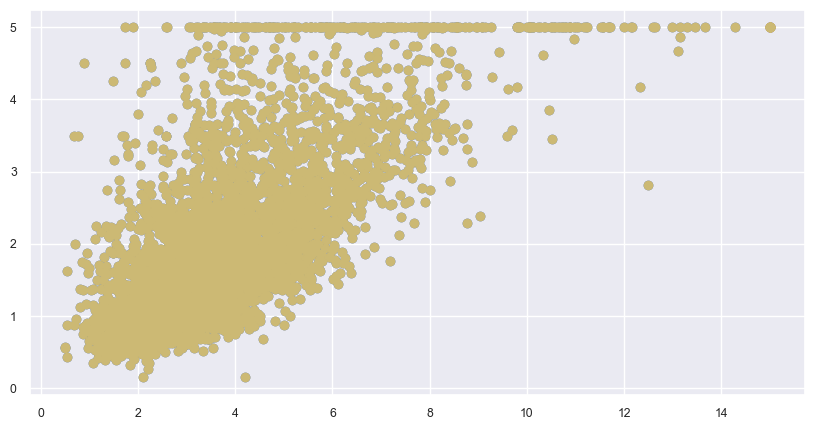

In [14]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [15]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 3.4219961724806257e-06


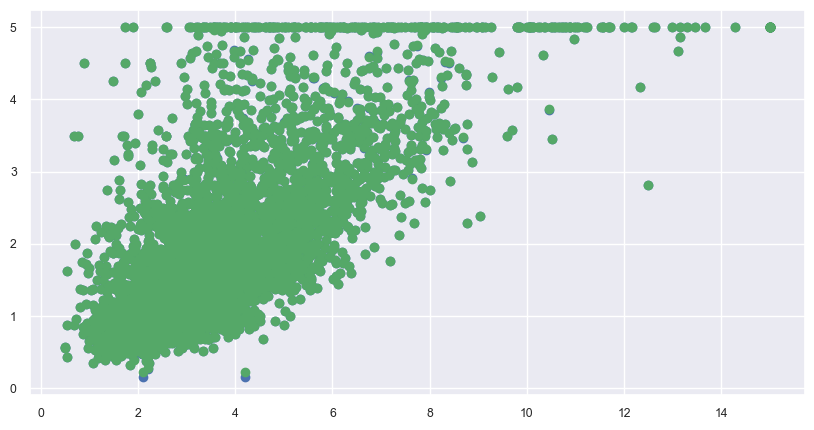

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 1.4891572059713845e-06


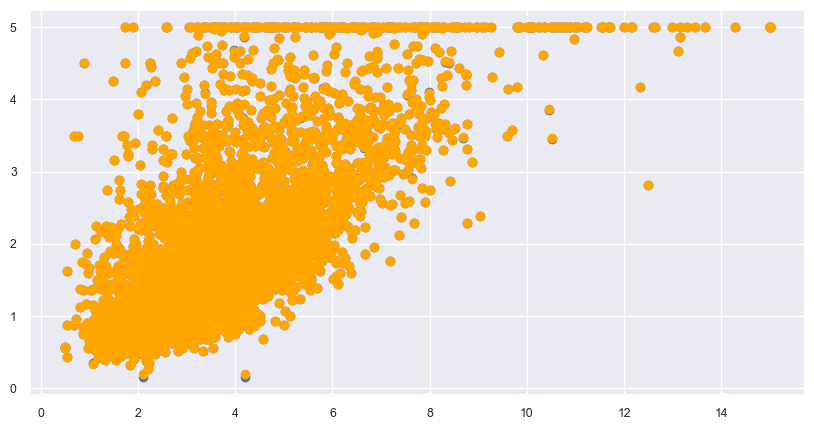

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()         

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()    